<table align="right" width=100%>
    <tr>
        <td width="20%">
            <img src="hcg-logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                  <b> CAPSTONE PROJECT DSE </b> 
                </font>
            </div>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> Home Credit Part 4: Model Evaluation & Tuning (DATASET 1) </b>
                </font>
             </div>
        </td>
    </tr>
</table>

# Welcome to Final Part of the Home Credit Capstone Project 

By now we have managed to extract 57 new features from the additional tables provided to us by home credit and also we handled the null values in our dataset by creating two different datasets and finally generated two new CSV files:
- application_data_cleaned_1.csv
- application_data_cleaned_2.csv

Further in Part 2 we tackled our next challenge to further enhance our data and prepare it for ML models. We simplified categorical features, transformed highly skewed numerical features, scaled them and created dummy for categorical features.

Finally, we created a Logistice Regression base model which currently sits at 0.75 ROC_AUC score.

Therefore, in this notebook, we aim to further enhance the performance of our model using various methods laid down below:

- 

<a id="home"></a>
## Table of Content (...in continuation)

- **[Import Libraries](#lib)**

- **[Creating Functions for Ease of Coding](#func)**


10. **[Fitting Models on the Final Reduced Dataset 1](#reduced)**
    - 10.1 - **[Logistic Regression Final Model](#logreg)**
    - 10.2 - **[Decision Tree Final Model](#dt)**
    - 10.3 - **[RandomForrest Final Model](#rf)**
    - 10.4 - **[XGBoost Final Model](#xgb)**
    - 10.5 - **[LGBoost Final Model](#lgb)**
    - 10.6 - **[Reduced Models Performance Summary](#summary)**
        
11. **[Using Stratified KFold Sampling on LGBM Classifier To Increase Performance](#kfold)**

12. **[Using SMOTE To Increase Performance](#smote)**

13. **[Final Feature Importance from Best Classifier](#feat_imp)**

14. **[Hyperparameter Tuning for the Best Classifier](#tuning)**

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore') 

#for displaying max columns
pd.pandas.set_option('display.max_columns', None)

## For Smote
from imblearn.over_sampling import SMOTE


# import train-test split 
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score,recall_score

# For oversampling
from imblearn.over_sampling import SMOTE

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import gc
import time

# Loading Final Dataset 1

In [137]:
df=pd.read_csv('scaled_df1_final.csv')

In [138]:
df= df.drop('Unnamed: 0',axis=1)

In [139]:
df.head()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Secondary_Education,CODE_GENDER_M,NAME_INCOME_TYPE_Working,OCCUPATION_TYPE_LOWER_SKILL,PAYMENT_RATE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE_OTHERS,GOODS_CREDIT_RATIO,TOTAL_INSTALLMENTS_POS,REG_CITY_NOT_LIVE_CITY,PERCENT_ON_TIME_INSTALLMENTS,NAME_EDUCATION_TYPE_Lower_Education,NAME_INCOME_TYPE_State servant,TOTAL_CUSTOMER_OVERDUE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_SUM,ORGANIZATION_TYPE_EDUCATION,prev_status_Refused,FLAG_WORK_PHONE,LIVE_REGION_NOT_WORK_REGION,DEBT_PERCENT,YIELD_GROUP_low,STD_CNT_PAYMENT,prev_status_Unused,AVG_CNT_PAYMENT,YEARS_BIRTH,DEF_60_CNT_SOCIAL_CIRCLE,AVG_AMT_ANNUITY,REG_CITY_NOT_WORK_CITY,NAME_FAMILY_STATUS_Unmarried,OVERDUE_DEBT_PERCENT,EMPLOYMENT_AGE_RATIO,ANNUITY_INCOME_RATIO,AVG_CREDIT_LIMIT,prev_POS,TOTAL_CUSTOMER_CREDIT,ORGANIZATION_TYPE_Self-employed,PERCENT_ON_TIME_PAYMENT_BUREAU,PERCENAT_CC_Completed,CNT_CHILDREN,YEARSDAYS_DECISION_prev,PERCENT_CREDIT_ACTIVE,YEARS_LAST_PHONE_CHANGE,OCCUPATION_TYPE_MEDIUM_SKILL,CLIENT_TYPE_New
0,0,1.283226,0.261573,1,1,1,1,1,-0.106682,2,1,1.038594,-1.237268,0,0.317794,0,0,-0.081089,-0.361308,-1.689042,0,-0.648302,1,0,-1.046740,-0.959963,-1.251932,-0.236677,-1.138154,0.701746,-0.304442,-0.806266,0,1,-0.074499,-1.003458,-1.607404,-0.598578,-0.125644,-0.406043,0,-0.639244,-0.1791,-0.653487,-0.089729,-1.098764,-0.165105,0,0.643156
1,0,0.025369,0.753278,0,1,0,1,1,-1.549076,2,0,0.533782,-0.088730,0,0.317794,0,0,-0.081089,-0.361308,-0.196070,0,1.130128,0,0,-1.046740,0.942006,1.376141,-0.236677,1.013136,0.692333,-0.304442,1.073897,0,0,-0.074499,0.255493,0.514547,1.873973,0.419734,-1.800617,0,-0.639244,-0.1791,-0.653487,-1.001466,-1.098764,-0.407236,0,0.643156
2,0,-0.495189,-0.951304,0,1,1,1,0,0.330236,2,1,1.038594,1.486249,0,-0.010185,0,0,-0.081089,-0.361308,0.924821,0,-0.648302,0,0,-1.046740,-0.959963,0.961496,-0.236677,0.821228,0.905162,-0.304442,0.071259,1,1,-0.074499,0.174848,-0.068071,-0.598578,0.419734,-0.492705,0,-0.639244,-0.1791,-0.653487,0.595614,-1.098764,0.190755,0,0.643156
3,0,0.664962,-0.787524,0,1,1,0,1,-0.400858,2,1,0.295444,1.924924,0,0.282476,0,1,-0.081089,-0.361308,-0.196070,0,-0.648302,1,0,1.051185,1.369464,0.670955,-0.236677,0.201988,0.218463,-0.304442,0.422258,0,0,-0.074499,-0.071235,0.712550,-0.598578,0.838217,-0.050895,0,-0.639244,-0.1791,-0.653487,0.543800,-0.065522,1.939479,0,0.643156
4,0,-0.072149,1.135899,1,0,0,0,0,1.862999,2,0,-0.046202,1.431086,0,0.293639,0,0,-0.081089,-0.361308,4.727439,0,-0.648302,0,0,0.341560,0.942006,-0.313400,-0.236677,-0.500710,-0.507725,-0.304442,-0.174924,0,0,-0.074499,0.946542,1.062616,-0.598578,2.041248,1.330023,0,-0.639244,-0.1791,1.358751,-0.250572,-0.409936,0.748390,1,-1.333405


In [140]:
df.shape

(212051, 49)

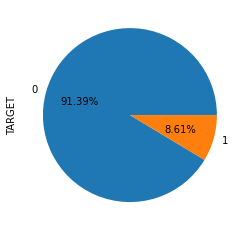

In [141]:
df['TARGET'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [142]:
df['TARGET'].value_counts()

0    193783
1     18268
Name: TARGET, dtype: int64

In [143]:
X = df.drop('TARGET',axis=1)
y = df['TARGET']

In [144]:
X.shape, y.shape

((212051, 48), (212051,))

## Our reduced Dataset is already Scaled and dummies are also created for categorical columns

<a id="func"></a>
# Functions for Ease of Coding

## a. Function to plot a confusion matrix

In [10]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

## b. Function to plot a roc_auc_curve 

In [11]:
   
def plot_roc_auc(model, X_test, y_test):

    plt.figure(figsize=(10,6))
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    #model

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Loan Defaulter Prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

## c. Function to Return scaled and dummy for X and y for Model Building

In [12]:
def dataset_processing(df, encoding='ohe',scaling='standard'):
    print("Shape of the Dataset Provided: ", df.shape)
    
    #scaling numeric features
    df_num = df.select_dtypes('number')
    num_cols =df_num.nunique()
    binary_cols = num_cols[num_cols<4].index
    df_num = df_num.drop(binary_cols, axis=1)
    
    if scaling=='minmax':
        
        from sklearn.preprocessing import MinMaxScaler
        
        mm = MinMaxScaler(feature_range = (0, 1))
        scaled = mm.fit_transform(df_num)
        
        df_scaled = pd.DataFrame(scaled, columns=df_num.columns)
        print("MinaMax Scaling Done...")
        
    elif scaling=='standard':
        df_scaled = (df_num - df_num.mean())/df_num.std()
        print("Standard Scaling Done...")
    
    elif scaling=='no':
        # not applying scaling
        df_scaled = df_num
        print("Not applying Scaling...")
        
    # Catch error if scaling scheme is not valid
    else:
        raise ValueError("Scaling must be either 'minmax' or 'standard' or 'no'")
        
        
    #creating dummies:
    df_cat = df.select_dtypes('object')
    
    if encoding=='ohe':
        df_cat = pd.get_dummies(df_cat, drop_first=True)
        print('Dummies Created...')
        
    # Integer label encoding
    elif encoding == 'le':
        
        from sklearn.preprocessing import LabelEncoder
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # Iterate through each column
        for col in df_cat.columns:
            df_cat[col] = label_encoder.fit_transform(np.array(df_cat[col].astype(str)).reshape((-1,)))
        
        print("Label Encoding Done...")
                
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
        
    df_final = pd.concat([df_scaled, df_cat],axis=1,join='inner')
    df_final = pd.concat([df[binary_cols], df_final], axis=1, join='inner')
    
    print("Processed Datset Shape: ", df_final.shape)
    
    X = df_final.drop('TARGET',axis=1)
    y = df_final['TARGET']
    
    return X, y

## d. Model Building Pipeline Function (latest version)

In [13]:
def build_model_pipeline(model_name, X,y, plot_graphs=False,feature_importance = False,over_sampling=False):
    
    # For over sampling
    if over_sampling==True:
        oversample = SMOTE()
        X, y = oversample.fit_resample(X, y)
        print('Over Sampling Done using SMOTE')
    
    
    X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)
    print('Train Test Split Done...')

    #X_train.shape , X_test.shape, y_train.shape, y_test.shape
    
    model = model_name

    model.fit(X_train,y_train)
    print('Model Fitted...')

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot_graphs == True:
        
        print(classification_report(y_train, y_pred_train))
        
        print(classification_report(y_test, y_pred_test))
        
        plot_confusion_matrix(model, X_test, y_test)
        
        plot_roc_auc(model, X_test, y_test)
    else:
        print(classification_report(y_train, y_pred_train))
        print(classification_report(y_test, y_pred_test))
    
    # saving performance metrics for the mode
    
    eval_metrics = [accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),f1_score(y_test, y_pred_test), roc_auc_score(y_test, y_pred_prob)]
    
    if feature_importance == True:
        important_features = pd.DataFrame({'Features': X_train.columns, 
                                       'Importance': model.feature_importances_})
        # sort the dataframe in the descending order according to the feature importance
        
        df_feature_importance = important_features.sort_values('Importance', ascending = False)

        return df_feature_importance, eval_metrics
    
    else: 
        return eval_metrics

## e. Dataframes for saving various combination of Model Scores

In [14]:
# for saving result of models

model_scores = pd.DataFrame(columns=['Accuracy_score', 'Recall_score','F1_score', 'ROC_AUC_Score'])

smote_model_scores = pd.DataFrame(columns=['Accuracy_score','Recall_score' ,'F1_score', 'ROC_AUC_Score'])

## g. Function to Plot Feature Importance

In [15]:
def plot_feature_importance(df):
    plt.figure(figsize=(10,6))
    
    # create a barplot to visualize the features based on their importance
    sns.barplot(x = 'Importance', y = 'Features', data = df.head(15))

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('Top 15 Important Features', fontsize = 15)
    plt.xlabel('Importance', fontsize = 12)
    plt.ylabel('Features', fontsize = 12)

    # display the plot
    plt.show()

<a id='reduced'></a>
# [10. Fitting Models on Final Dataset](#home)

<a id='logreg'></a>
## 10.1 Logistic Regression Final Model

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    155052
           1       0.51      0.02      0.04     14588

    accuracy                           0.91    169640
   macro avg       0.71      0.51      0.50    169640
weighted avg       0.88      0.91      0.88    169640

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38731
           1       0.44      0.02      0.03      3680

    accuracy                           0.91     42411
   macro avg       0.68      0.51      0.49     42411
weighted avg       0.87      0.91      0.87     42411



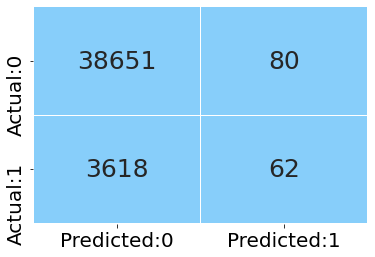

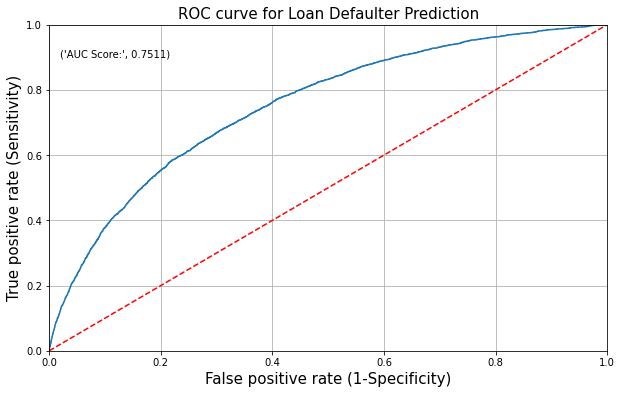

In [145]:
model_scores.loc['LR_Final_Model'] = build_model_pipeline(LogisticRegression(), X,y,plot_graphs=True)

<a id='dt'></a>
## 10.2 Decision Tree Final Model

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    155052
           1       0.74      0.12      0.21     14588

    accuracy                           0.92    169640
   macro avg       0.83      0.56      0.58    169640
weighted avg       0.91      0.92      0.89    169640

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     38731
           1       0.30      0.05      0.08      3680

    accuracy                           0.91     42411
   macro avg       0.61      0.52      0.52     42411
weighted avg       0.86      0.91      0.88     42411



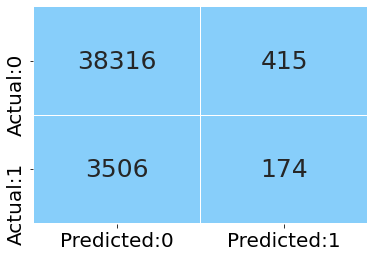

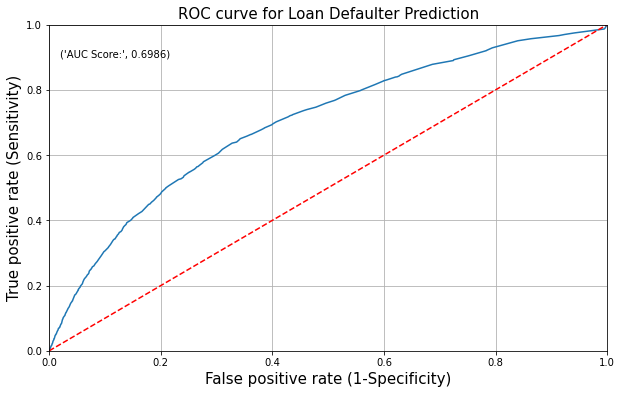

In [146]:
model_scores.loc['DT_Final_Model'] = build_model_pipeline(DecisionTreeClassifier(max_depth=10), X,y,plot_graphs=True)

<a id='rf'></a>
## 10.3 RandomForrest Final Model

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.91      1.00      0.96    155052
           1       1.00      0.01      0.01     14588

    accuracy                           0.91    169640
   macro avg       0.96      0.50      0.48    169640
weighted avg       0.92      0.91      0.87    169640

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     38731
           1       0.75      0.00      0.00      3680

    accuracy                           0.91     42411
   macro avg       0.83      0.50      0.48     42411
weighted avg       0.90      0.91      0.87     42411



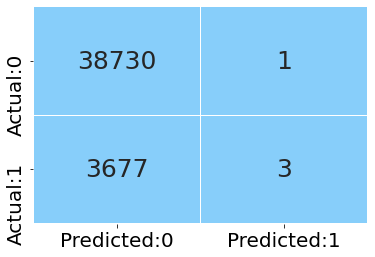

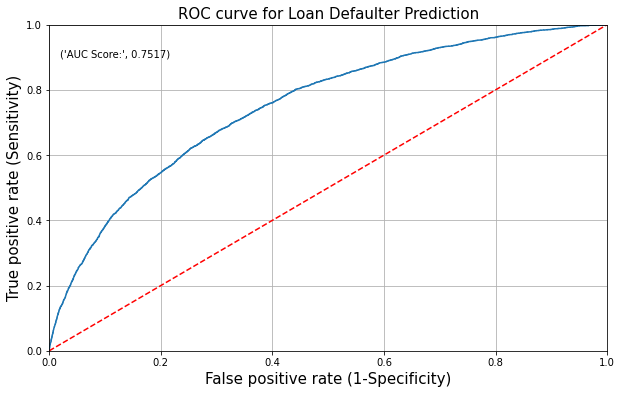

In [191]:
model_scores.loc['RF_Final_Model'] = build_model_pipeline(RandomForestClassifier(max_depth=10), X,y,plot_graphs=True)

<a id='xgb'></a>
## 10.4 XGBoost Reduced Model

Train Test Split Done...
[06:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Fitted...
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    155052
           1       0.86      0.13      0.23     14588

    accuracy                           0.92    169640
   macro avg       0.89      0.57      0.60    169640
weighted avg       0.92      0.92      0.90    169640

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     38731
           1       0.46      0.06      0.10      3680

    accuracy                           0.91     42411
   macro avg       0.69      0.52      0.53     42411
weighted avg       0.88      0.91      0.88     42

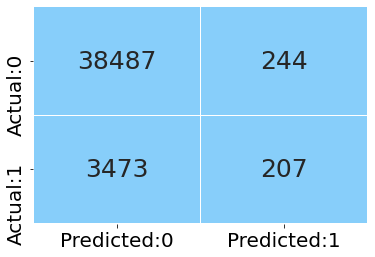

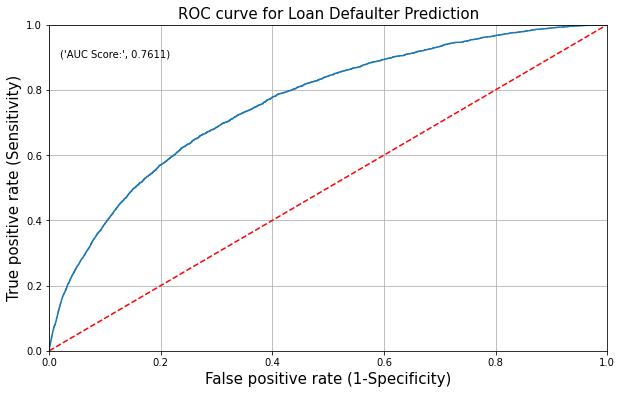

In [148]:
model_scores.loc['XGB_Final_Model'] = build_model_pipeline(XGBClassifier(), X,y,plot_graphs=True)

<a id='lgb'></a>
## 10.5 LightGradientBoost Reduced Model

In [187]:
lgb = LGBMClassifier()

Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    155052
           1       0.72      0.05      0.09     14588

    accuracy                           0.92    169640
   macro avg       0.82      0.52      0.53    169640
weighted avg       0.90      0.92      0.88    169640

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     38731
           1       0.56      0.04      0.07      3680

    accuracy                           0.91     42411
   macro avg       0.74      0.52      0.51     42411
weighted avg       0.89      0.91      0.88     42411



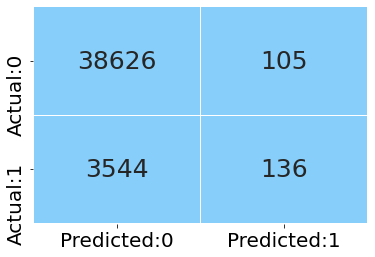

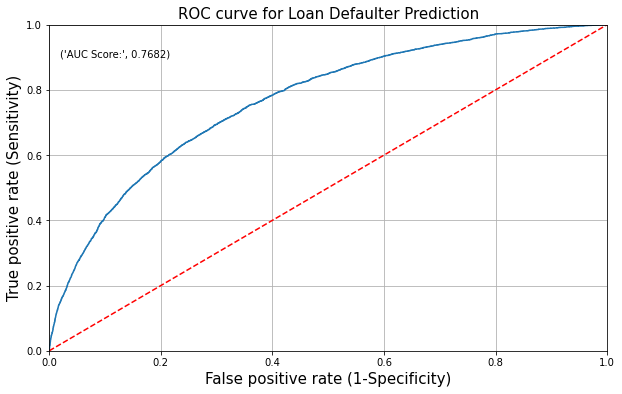

In [188]:
model_scores.loc['LGB_Final_Model'] = build_model_pipeline(lgb, X,y,plot_graphs=True)

<a id='summary'></a>
## [10.6 Final Models Performance Summary](#home)

In [190]:
model_scores

,Accuracy_score,Recall_score,F1_score,ROC_AUC_Score
LR_Final_Model,0.912806,0.016848,0.032444,0.751133
DT_Final_Model,0.907548,0.047283,0.081518,0.698588
RF_Final_Model,0.913372,0.005978,0.011834,0.735018
XGB_Final_Model,0.912358,0.056250,0.100218,0.761051
LGB_Final_Model,0.913961,0.036957,0.069370,0.768175


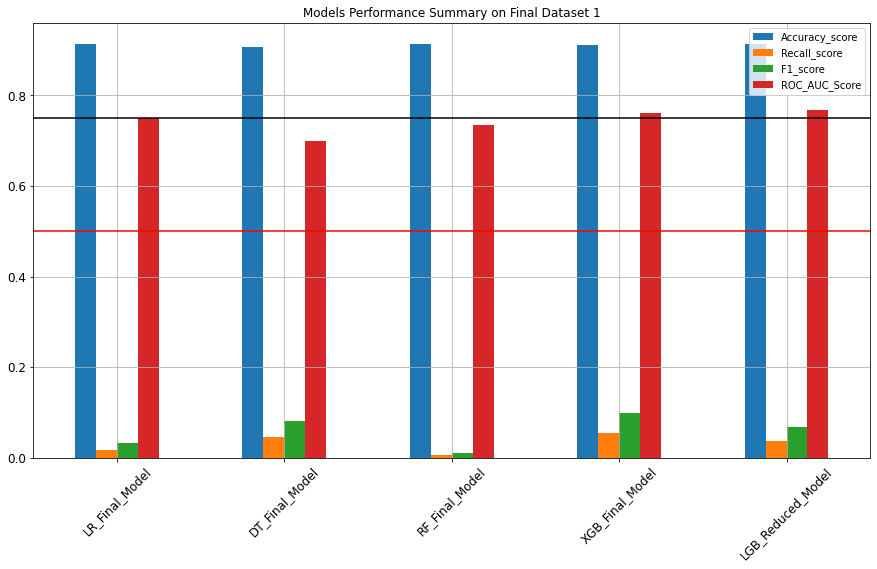

In [151]:
model_scores.plot(kind='bar', figsize=(15,8), title="Models Performance Summary on Final Dataset 1",fontsize=12)
plt.grid()
plt.axhline(0.75, color='black')
plt.axhline(0.5,color='r')
plt.xticks(rotation='45')
plt.show()

In [167]:
# saving the results of reduced_model_scores 

model_scores.to_csv('reduced_model_scores_dataset1.csv')

**Inference:**

- The LGB Model is still having the best AUC Score.
- However, XGBModel has again a better Recall and F1 and almost similar AUC_score.
- Hence, going with XGB Model for building final SMOTE model with 48 features and further, we wil use XGBModel for Hyperparameter Tuning as well.
- **For next part, we will use LGBModel for Kfold Cross validation results, since, LGB is the computationally fastest.**


<a id='kfold'></a>
# [11. Using Stratified KFold Sampling To Increase Performance](#home)

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
import gc
import time

In [26]:
X.shape, y.shape

((212051, 40), (212051,))

In [71]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

## 11.1 LGBMClassifier Model Evaluation With KFold

In [27]:
def kfold_lightgbm(X,y, num_folds=10, stratified = False, debug= False):
    
    print("Starting LightGBM. X shape: {}, y shape: {}".format(X.shape, y.shape))
    
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(X.shape[0])
    feature_importance_df = pd.DataFrame()
    folds_list = []
    roc_auc_score_list = []
    feats = X.columns
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X[feats], y)):
        train_x, train_y = X[feats].iloc[train_idx], y.iloc[train_idx]
        valid_x, valid_y = X[feats].iloc[valid_idx], y.iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)
        
        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        folds_list.append(n_fold+1)
        roc_auc_score_list.append(roc_auc_score(valid_y, oof_preds[valid_idx]))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(y, oof_preds))
    df_roc_auc_score = pd.DataFrame({'Folds': folds_list, 
                                    'ROC_AUC_Score': roc_auc_score_list})
    # Write submission file and plot feature importance
    
    return feature_importance_df, df_roc_auc_score, oof_preds

In [193]:
# Display/plot feature importance from 10 fold Cv of LGBM model

def display_importances(feature_importance_df_):
    
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:25].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(9, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Top 25 Features (avg over folds)',fontsize=15)
    plt.xlabel('Importance',fontsize=12)
    plt.ylabel('Features',fontsize=12)
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')
    plt.show()

In [152]:
t0 = time.time()

feat_importance, df_roc_auc_score, oof_preds = kfold_lightgbm(X,y, num_folds= 10, stratified= False, debug= False)

print("Total Runtime for LightGBM with 10 fold is: ", time.time()-t0 ,'seconds')

Starting LightGBM. X shape: (212051, 48), y shape: (212051,)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.784351	training's binary_logloss: 0.250192	valid_1's auc: 0.768066	valid_1's binary_logloss: 0.252496
[400]	training's auc: 0.802996	training's binary_logloss: 0.242273	valid_1's auc: 0.775066	valid_1's binary_logloss: 0.24967
[600]	training's auc: 0.815355	training's binary_logloss: 0.237381	valid_1's auc: 0.776805	valid_1's binary_logloss: 0.249046
[800]	training's auc: 0.825197	training's binary_logloss: 0.233438	valid_1's auc: 0.777121	valid_1's binary_logloss: 0.248858
Early stopping, best iteration is:
[710]	training's auc: 0.820872	training's binary_logloss: 0.235163	valid_1's auc: 0.777324	valid_1's binary_logloss: 0.248849
Fold  1 AUC : 0.777324
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ign

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.785539	training's binary_logloss: 0.249121	valid_1's auc: 0.753692	valid_1's binary_logloss: 0.26267
[400]	training's auc: 0.804312	training's binary_logloss: 0.241211	valid_1's auc: 0.759578	valid_1's binary_logloss: 0.260133
[600]	training's auc: 0.816459	training's binary_logloss: 0.236295	valid_1's auc: 0.761494	valid_1's binary_logloss: 0.259438
[800]	training's auc: 0.826326	training's binary_logloss: 0.232306	valid_1's auc: 0.762248	valid_1's binary_logloss: 0.259296
[1000]	training's auc: 0.834866	training's binary_logloss: 0.228851	valid_1's auc: 0.762813	valid_1's binary_logloss: 0.259216
[1200]	training's auc: 0.842337	training's binary_logloss: 0.225674	valid_1's auc: 0.763131	valid_1's binary_logloss: 0.259245
Early stopping, best iteration is:
[1039]	training's auc: 0.836367	t

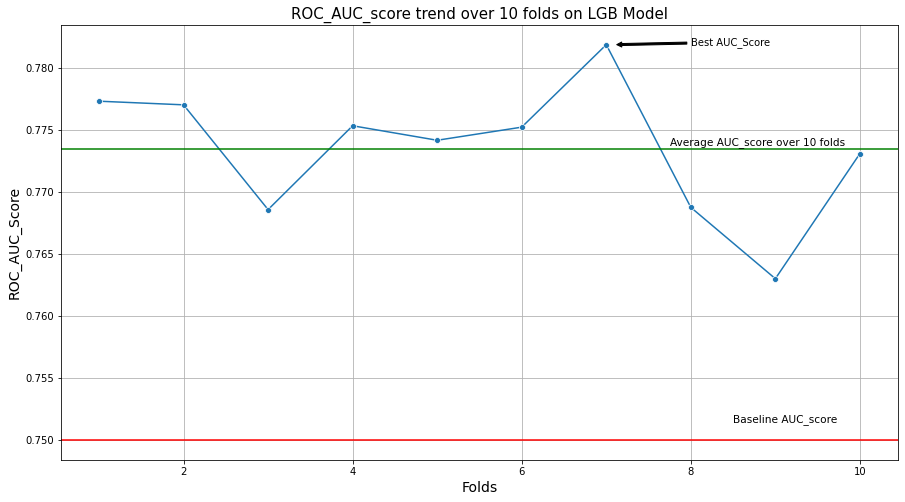

In [165]:
plt.figure(figsize=(15,8))

plt.title("ROC_AUC_score trend over 10 folds on LGB Model",fontsize=15)

sns.lineplot(y=df_roc_auc_score['ROC_AUC_Score'], x=df_roc_auc_score['Folds'], marker='o')

# labels
plt.xlabel("Folds",fontsize=14)
plt.ylabel("ROC_AUC_Score",fontsize=14)
plt.axhline(0.773444,color='g')
plt.axhline(0.75,color='r')

# annotations
plt.annotate(s = 'Baseline AUC_score', xy = (3.5, 0.7515), xytext = (8.5, 0.7515),fontsize=10.5)
plt.annotate(s = 'Average AUC_score over 10 folds', xy = (1.5, 0.773444), xytext = (7.75, 0.7738),fontsize=10.5)
plt.annotate(s = 'Best AUC_Score', xy = (7.1, 0.781881), xytext = (8, 0.781881), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.grid()
plt.show()

In [154]:
print("Best score from 10 folds is:  %.6f"% max(df_roc_auc_score['ROC_AUC_Score']))
print('Mean score from 10 folds is: %.6f' % df_roc_auc_score['ROC_AUC_Score'].mean())

Best score from 10 folds is:  0.781881
Mean score from 10 folds is: 0.773444


## Feature Importance from 10Fold Cross Validation of LightGBM classifier

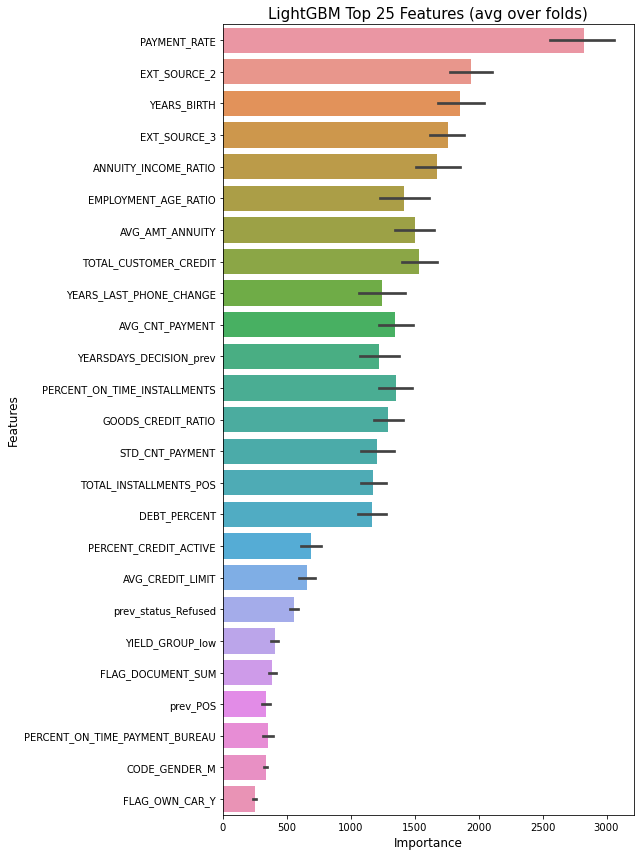

In [194]:
display_importances(feat_importance)

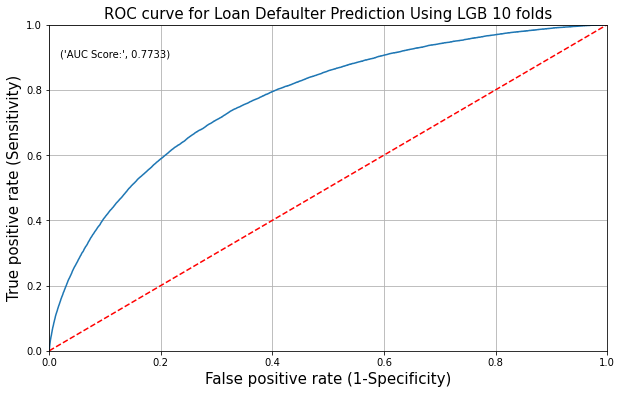

In [168]:
plt.figure(figsize=(10,6))

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(y, oof_preds)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Using LGB 10 folds', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y, oof_preds),4)))

# plot the grid
plt.grid(True)

<a id='smote'></a>
# [12. Using SMOTE To Increase Performance](#home)

### Distribution of `Target` Before applying SMOTE

0    193783
1     18268
Name: TARGET, dtype: int64


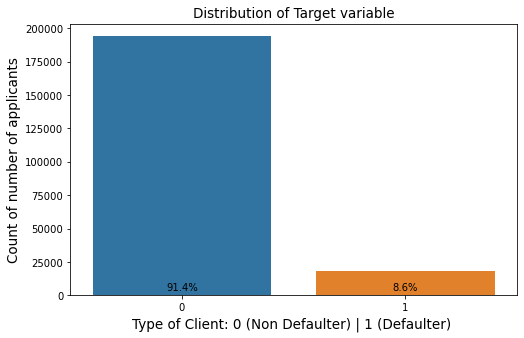

In [200]:
plt.figure(figsize=(8,5))

print(y.value_counts())
ax = sns.countplot(y)
height = list(round(y.value_counts(normalize=True),4)*100)

for p,h in zip(ax.patches, height):
    ax.annotate('{:.1f}%'.format(h),
      xy=(p.get_x() + p.get_width() / 2,h),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
plt.title('Distribution of Target variable', fontsize = 13.5)
plt.ylabel('Count of number of applicants', fontsize = 13.5)
plt.xlabel('Type of Client: 0 (Non Defaulter) | 1 (Defaulter) ', fontsize = 13.5)

plt.show()

### Distribution of `Target` After applying SMOTE

In [197]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

0    193783
1    193783
Name: TARGET, dtype: int64


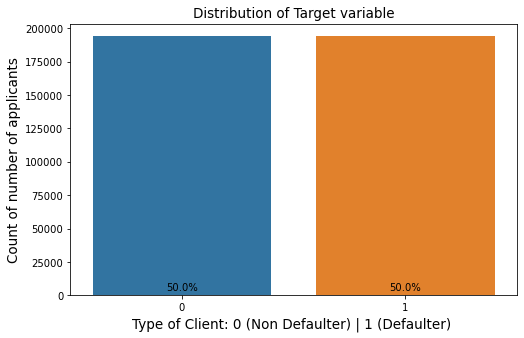

In [199]:
plt.figure(figsize=(8,5))

print(y_smote.value_counts())
ax = sns.countplot(y_smote)
height = list(round(y_smote.value_counts(normalize=True),4)*100)

for p,h in zip(ax.patches, height):
    ax.annotate('{:.1f}%'.format(h),
      xy=(p.get_x() + p.get_width() / 2,h),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
plt.title('Distribution of Target variable', fontsize = 13.5)
plt.ylabel('Count of number of applicants', fontsize = 13.5)
plt.xlabel('Type of Client: 0 (Non Defaulter) | 1 (Defaulter) ', fontsize = 13.5)

plt.show()

## 12.1 Logistic regression with SMOTE

Over Sampling Done using SMOTE
Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.78      0.77      0.78    154797
           1       0.78      0.78      0.78    155255

    accuracy                           0.78    310052
   macro avg       0.78      0.78      0.78    310052
weighted avg       0.78      0.78      0.78    310052

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     38986
           1       0.77      0.77      0.77     38528

    accuracy                           0.77     77514
   macro avg       0.77      0.77      0.77     77514
weighted avg       0.77      0.77      0.77     77514



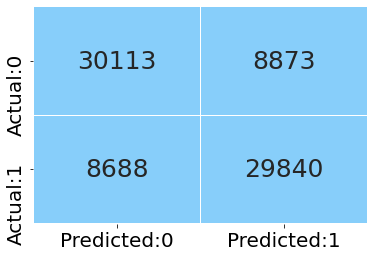

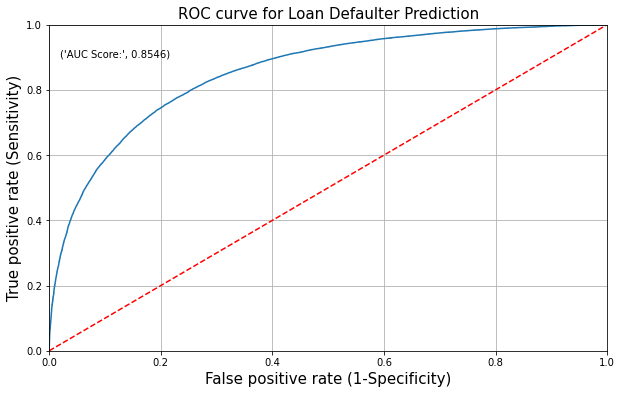

In [169]:
smote_model_scores.loc['LR_Final_Model(SMOTE)'] = build_model_pipeline(LogisticRegression(), 
                                                                   X,y,plot_graphs=True,over_sampling=True)

## 12.2 Decision Tree Reduced Model with SMOTE

Over Sampling Done using SMOTE
Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.80      0.75      0.78    154797
           1       0.77      0.81      0.79    155255

    accuracy                           0.78    310052
   macro avg       0.78      0.78      0.78    310052
weighted avg       0.78      0.78      0.78    310052

              precision    recall  f1-score   support

           0       0.79      0.74      0.77     38986
           1       0.76      0.80      0.78     38528

    accuracy                           0.77     77514
   macro avg       0.77      0.77      0.77     77514
weighted avg       0.77      0.77      0.77     77514



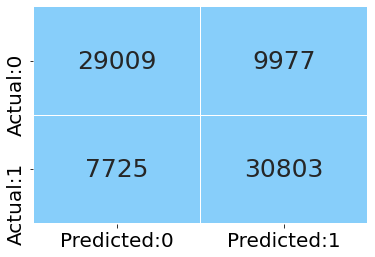

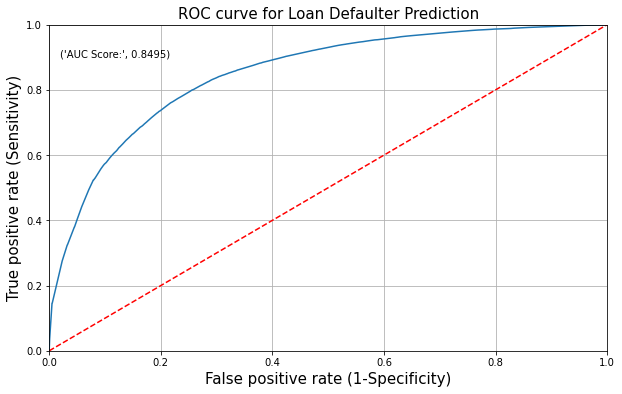

In [170]:
smote_model_scores.loc['DT_Final_Model(SMOTE)'] = build_model_pipeline(DecisionTreeClassifier(max_depth=10), 
                                                                   X,y,plot_graphs=True,over_sampling=True)

## 12.4 RandomForrest Reduced Model with SMOTE

Over Sampling Done using SMOTE
Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.85      0.83      0.84    154797
           1       0.84      0.85      0.84    155255

    accuracy                           0.84    310052
   macro avg       0.84      0.84      0.84    310052
weighted avg       0.84      0.84      0.84    310052

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     38986
           1       0.83      0.84      0.83     38528

    accuracy                           0.83     77514
   macro avg       0.83      0.83      0.83     77514
weighted avg       0.83      0.83      0.83     77514



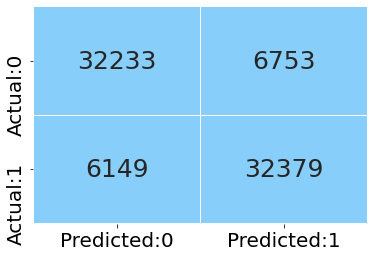

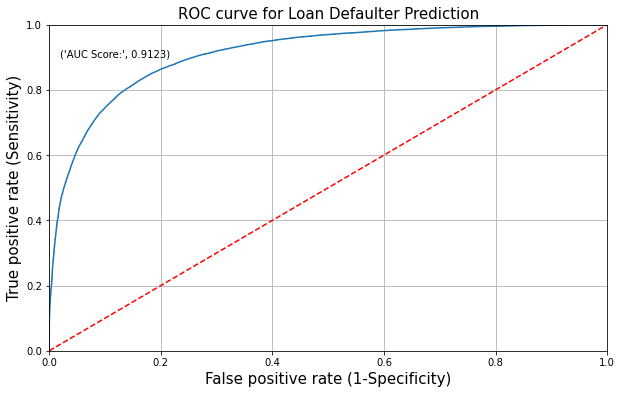

In [171]:
rf_feat_imp_smote, smote_model_scores.loc['RF_Final_Model(SMOTE)'] = build_model_pipeline(RandomForestClassifier(max_depth=10),
                                                                                            X,y,plot_graphs=True,over_sampling=True,
                                                                                            feature_importance=True)

## 12.5 XGBoost Final Model with SMOTE

Over Sampling Done using SMOTE
Train Test Split Done...
[07:03:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Fitted...
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    154797
           1       0.99      0.91      0.95    155255

    accuracy                           0.95    310052
   macro avg       0.95      0.95      0.95    310052
weighted avg       0.95      0.95      0.95    310052

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     38986
           1       0.98      0.91      0.94     38528

    accuracy                           0.94     77514
   macro avg       0.95      0.94      0.94     77514
weighted avg       

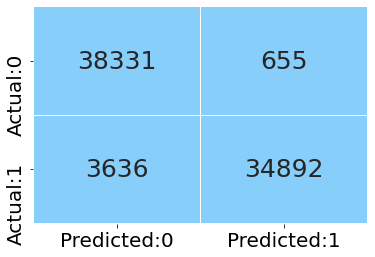

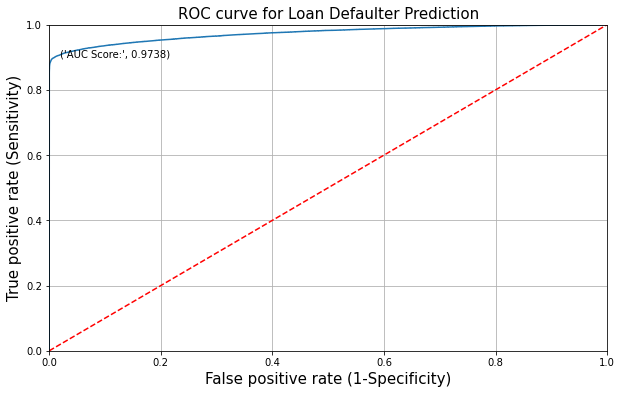

In [172]:
xgb_feat_imp_smote, smote_model_scores.loc['XGB_Final_Model(SMOTE)'] = build_model_pipeline(XGBClassifier(), 
                                                                   X,y,plot_graphs=True,over_sampling=True,
                                                                                             feature_importance=True)

## 12.6 LightGradientBoost Reduced Model with SMOTE

Over Sampling Done using SMOTE
Train Test Split Done...
Model Fitted...
              precision    recall  f1-score   support

           0       0.91      0.98      0.94    154797
           1       0.98      0.90      0.94    155255

    accuracy                           0.94    310052
   macro avg       0.94      0.94      0.94    310052
weighted avg       0.94      0.94      0.94    310052

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     38986
           1       0.98      0.90      0.93     38528

    accuracy                           0.94     77514
   macro avg       0.94      0.94      0.94     77514
weighted avg       0.94      0.94      0.94     77514



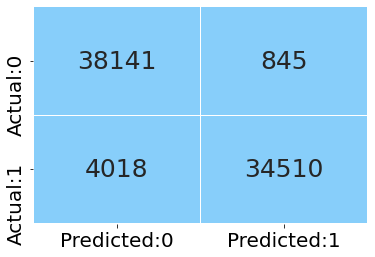

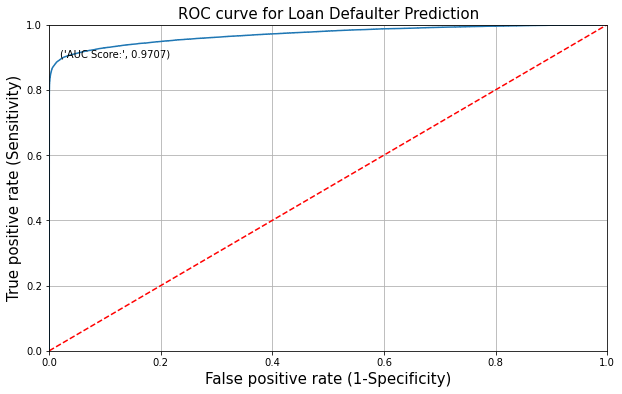

In [173]:
lgb_feat_imp_smote, smote_model_scores.loc['LGBM_Final_Model(SMOTE)'] = build_model_pipeline(lgb,X,y,plot_graphs=True,
                                                                                               over_sampling=True,
                                                                                               feature_importance=True)

## [12.7 Performance Summary of Reduced Models with SMOTE](#home)

In [176]:
smote_model_scores

,Accuracy_score,Recall_score,F1_score,ROC_AUC_Score
LR_Final_Model(SMOTE),0.773447,0.774502,0.772647,0.854623
DT_Final_Model(SMOTE),0.771628,0.799496,0.776794,0.849471
RF_Final_Model(SMOTE),0.833553,0.840402,0.833866,0.912348
XGB_Final_Model(SMOTE),0.944642,0.905627,0.942072,0.973757
LGBM_Final_Model(SMOTE),0.937263,0.895712,0.934180,0.970705


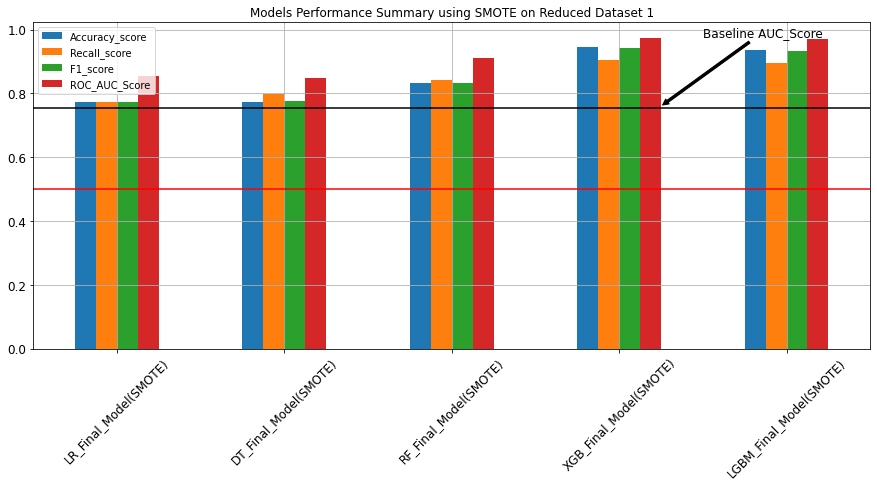

In [177]:
smote_model_scores.plot(kind='bar', figsize=(15,6) ,title="Models Performance Summary using SMOTE on Reduced Dataset 1",fontsize=12)
plt.grid()
plt.axhline(0.753028, color='black')
plt.axhline(0.5,color='r')
plt.xticks(rotation='45')

# annotations
plt.annotate(s = 'Baseline AUC_Score', xy = (3.25, 0.7599), xytext = (3.5, 0.98), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'),fontsize=12)

plt.show()

In [168]:
# saving the performance of Smote Models in a csv file

smote_model_scores.to_csv('smote_model_scores_dataset1.csv')

<a id = 'feat_imp'></a>
# [13. Feature Importance from Best Model: XGB Classifier](#home)

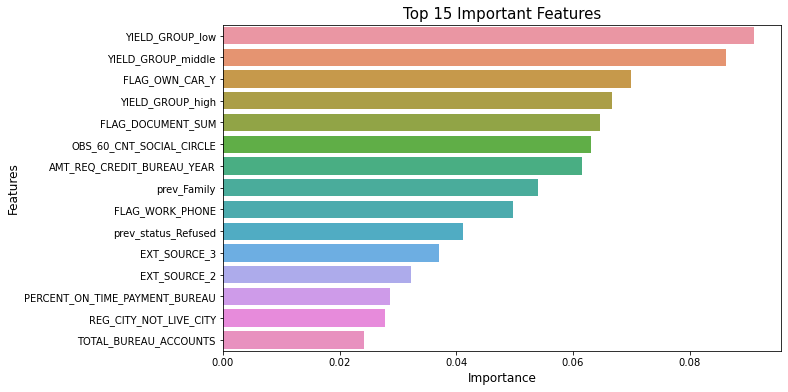

In [120]:
plot_feature_importance(xgb_feat_imp_smote)

<a id = 'tuning'></a>
# [14. Hyperparameter Tuning for the Best Model: XGB Classifier](#home)

In [178]:
tuned_paramaters= [{"learning_rate"    : [ 0.10, 0.15],
                    "max_depth"        : [ 10,20],
                    "min_child_weight" : [ 1, 3, ],
                    "gamma"            : [ 0.0,0.2],
                    "colsample_bytree" : [ 0.3,0.5 ] }]

In [109]:
xgb_model = XGBClassifier()

In [179]:
xgb_random = RandomizedSearchCV(estimator =xgb_model, 
                                param_distributions= tuned_paramaters,
                                verbose=True, 
                                cv = 3,
                                n_iter=10)

In [180]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)


In [181]:
X_train,X_test, y_train, y_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=10)

In [182]:
t0 = time.time()

xgb_tuned_model = xgb_random.fit(X_train, y_train)

print("Total Runtime for XGB Classifier Hyperparameter with 3 fold Random CV is: ", time.time()-t0 ,'seconds')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[07:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:13:22

[14:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [183]:
# get the best parameters
print('Best parameters for XGB classifier: ', xgb_tuned_model.best_params_, '\n')

Best parameters for XGB classifier:  {'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.5} 



## Building Final Tuned model on the best parameters obtained from Hyperparameter Tuning  

In [184]:
xgb_final_model = XGBClassifier(min_child_weight=1, 
                                max_depth= 20, 
                                learning_rate=0.15, 
                                gamma= 0.2,
                                colsample_bytree=0.5)

Over Sampling Done using SMOTE
Train Test Split Done...
[14:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Fitted...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    154797
           1       1.00      1.00      1.00    155255

    accuracy                           1.00    310052
   macro avg       1.00      1.00      1.00    310052
weighted avg       1.00      1.00      1.00    310052

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     38986
           1       0.99      0.92      0.95     38528

    accuracy                           0.95     77514
   macro avg       0.96      0.95      0.95     77514
weighted avg       

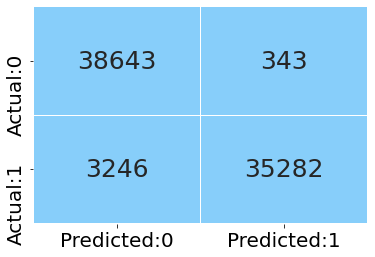

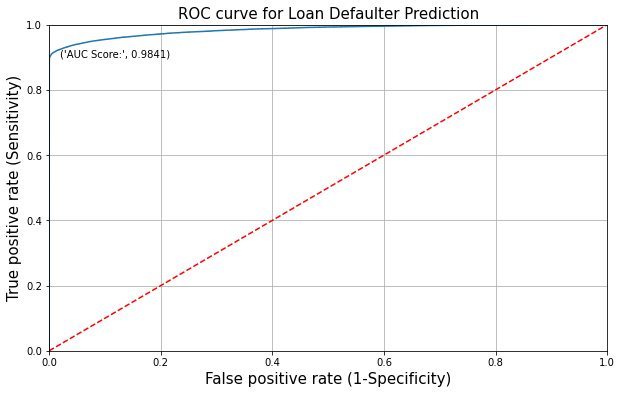

In [185]:
smote_model_scores.loc['XGB_Final_Tuned_Model'] = build_model_pipeline(xgb_final_model,
                                            X,y,plot_graphs=True,over_sampling=True)

In [186]:
smote_model_scores

,Accuracy_score,Recall_score,F1_score,ROC_AUC_Score
LR_Final_Model(SMOTE),0.773447,0.774502,0.772647,0.854623
DT_Final_Model(SMOTE),0.771628,0.799496,0.776794,0.849471
RF_Final_Model(SMOTE),0.833553,0.840402,0.833866,0.912348
XGB_Final_Model(SMOTE),0.944642,0.905627,0.942072,0.973757
LGBM_Final_Model(SMOTE),0.937263,0.895712,0.934180,0.970705
XGB_Final_Tuned_Model,0.953699,0.915750,0.951600,0.984126


# [15. Summary of the XGBoost Tuned Model](#home)

In [201]:
smote_model_scores.loc[['XGB_Final_Model(SMOTE)','XGB_Final_Tuned_Model']]

,Accuracy_score,Recall_score,F1_score,ROC_AUC_Score
XGB_Final_Model(SMOTE),0.944642,0.905627,0.942072,0.973757
XGB_Final_Tuned_Model,0.953699,0.915750,0.951600,0.984126


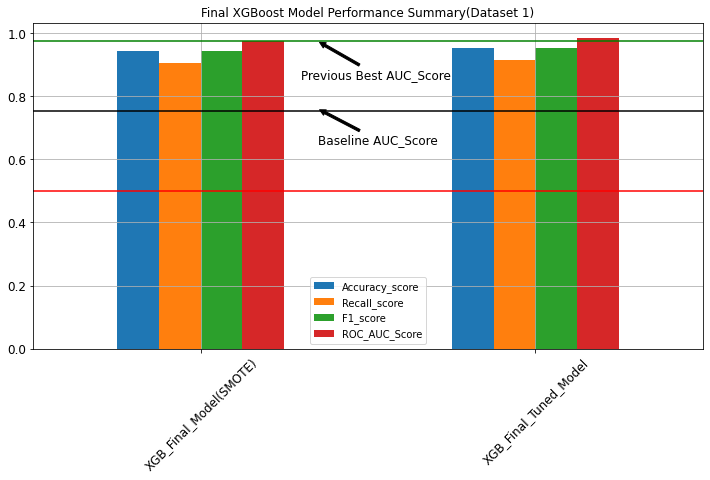

In [210]:
#smote_model_scores

smote_model_scores.loc[['XGB_Final_Model(SMOTE)','XGB_Final_Tuned_Model']].plot(kind='bar', figsize=(12,6) ,
                                                                                title="Final XGBoost Model Performance Summary(Dataset 1)",fontsize=12)
plt.grid()
plt.axhline(0.753028, color='black')
plt.axhline(0.5,color='r')
plt.axhline(0.973757,color='g')

plt.xticks(rotation='45')

# annotations
plt.annotate(s = 'Baseline AUC_Score', xy = (0.35, 0.7599), xytext = (0.35, 0.65), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'),fontsize=12)
plt.annotate(s = 'Previous Best AUC_Score', xy = (0.35, 0.973757), xytext = (0.30, 0.85757), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'),fontsize=12)


plt.show()

**Inference:**
- The positive impact of Hyperparameter Tuning is clearly noticeable above.
- All the metrics including Recall_score and F1_score are increased by approx. 1 %.
- We can see below the chart for comparison of Final `XGBoost Model` before and after tuning it.
- The Green line is the line for AUC_score obtained from SMOTE.
- This is a positive outcome of all the hardowork and efforts put into the Data Processing and Preparation.
